In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity, mean_squared_error

In [9]:
# 1. Загрузите изображение в оттенках серого sar_1_gray.jpg.
image = cv2.imread('sar_1_gray.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print("1. Изображение загружено в оттенках серого")

1. Изображение загружено в оттенках серого


2. Гистограмма:


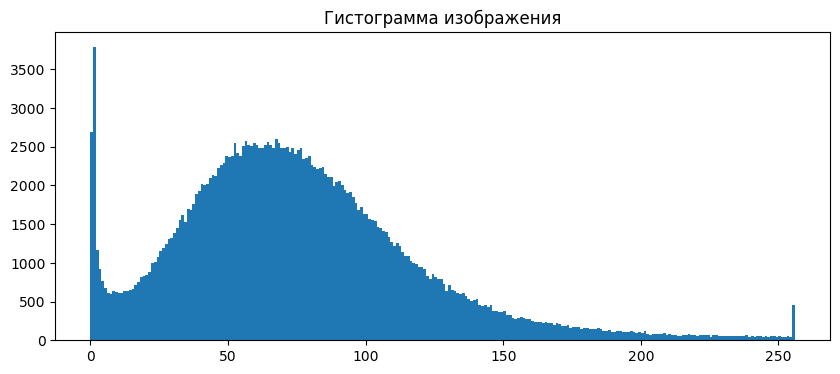

In [10]:
# 2. постройте гистограмму
print("2. Гистограмма:")
plt.figure(figsize=(10, 4))
plt.hist(image_gray.ravel(), bins=256, range=[0, 256])
plt.title('Гистограмма изображения')
plt.show()

3. Гамма-коррекция:


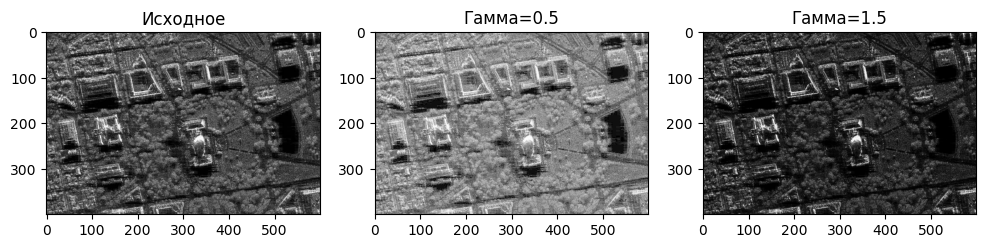

In [11]:
# 3. реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.
print("3. Гамма-коррекция:")

gamma_05 = np.uint8(((image_gray / 255.0) ** 0.5) * 255)
gamma_15 = np.uint8(((image_gray / 255.0) ** 1.5) * 255)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Исходное')

plt.subplot(1, 3, 2)
plt.imshow(gamma_05, cmap='gray')
plt.title('Гамма=0.5')

plt.subplot(1, 3, 3)
plt.imshow(gamma_15, cmap='gray')
plt.title('Гамма=1.5')
plt.show()

In [12]:
# 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.
print("4. Сравнение MSE, SSIM:")

ssim_05 = structural_similarity(image_gray, gamma_05)
ssim_15 = structural_similarity(image_gray, gamma_15)

mse_05 = mean_squared_error(image_gray, gamma_05)
mse_15 = mean_squared_error(image_gray, gamma_15)

print(f"Гамма=0.5: MSE={mse_05:.2f}, SSIM={ssim_05:.4f}")
print(f"Гамма=1.5: MSE={mse_15:.2f}, SSIM={ssim_15:.4f}")

4. Сравнение MSE, SSIM:
Гамма=0.5: MSE=3250.43, SSIM=0.7875
Гамма=1.5: MSE=971.82, SSIM=0.8066


5. Статистическая цветокоррекция:


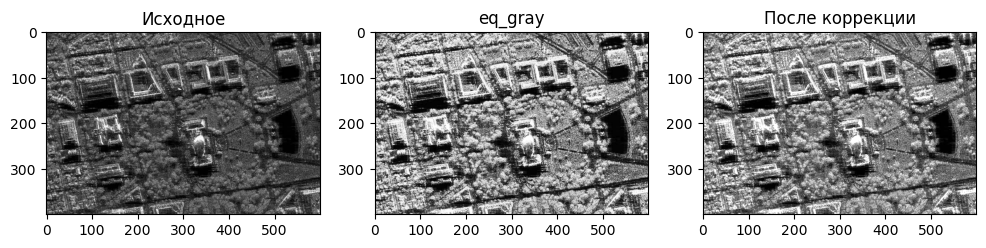

In [13]:
# 5. реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.
print("5. Статистическая цветокоррекция:")

eq_gray = cv2.equalizeHist(image_gray)

mean_orig = image_gray.mean()
std_orig = image_gray.std()

mean_eq = eq_gray.mean()
std_eq = eq_gray.std()

stat_corrected = (image_gray - mean_orig) * (std_eq / std_orig) + mean_eq
stat_corrected = np.clip(stat_corrected, 0, 255).astype(np.uint8)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Исходное')

plt.subplot(1, 3, 2)
plt.imshow(eq_gray, cmap='gray')
plt.title('eq_gray')

plt.subplot(1, 3, 3)
plt.imshow(stat_corrected, cmap='gray')
plt.title('После коррекции')
plt.show()

6. Пороговая фильтрация:


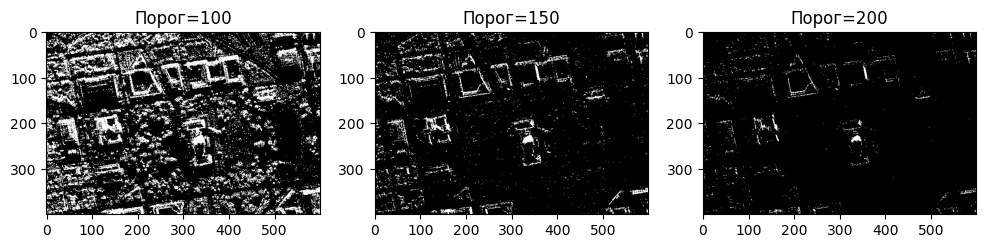

In [7]:
# 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.
print("6. Пороговая фильтрация:")

thresholds = [100, 150, 200]

plt.figure(figsize=(12, 4))
for i, thresh_val in enumerate(thresholds):
    _, thresh = cv2.threshold(image_gray, thresh_val, 255, cv2.THRESH_BINARY)

    plt.subplot(1, 3, i + 1)
    plt.imshow(thresh, cmap='gray')
    plt.title(f'Порог={thresh_val}')

plt.show()